In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from helpers import imshow

In [3]:
def whiteOut(frame):
    #remove white stuff, return a mask of the intsresting stuff
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # define range of white color in HSV
    # change it according to your need !
    sensitivity = 14
    #lower_white = np.array([0,0,255-sensitivity])
    #upper_white = np.array([255,sensitivity,255])
    
    lower_white = np.array([0, 0, 255-sensitivity])
    upper_white = np.array([180, sensitivity, 255])
    
    # Threshold the HSV image to get only white colors
    mask = cv2.inRange(hsv, lower_white, upper_white)
    # Bitwise-AND mask and original image
    #res = cv2.bitwise_and(frame,frame, mask= mask)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    
    # applying Morphological Operator to the image to clean the image
    kernel = np.ones((3, 3),np.uint8)
    iteration_close = 1
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel,iterations = iteration_close)
    iteration_open = 2
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel,iterations = iteration_open)
    
    # applying Morphological Operator to the image to clean the image
    kernel = np.ones((3, 3),np.uint8)
    iteration_close = 1
    res = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel,iterations = iteration_close)
    iteration_open = 2
    res = cv2.morphologyEx(res, cv2.MORPH_OPEN, kernel,iterations = iteration_open)    
    
    return mask,np.abs(255-res)
    #1 - res is what we want, np.multiply(frame,1-res) gives what we want

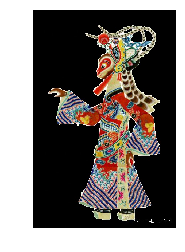

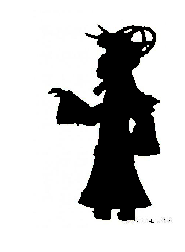

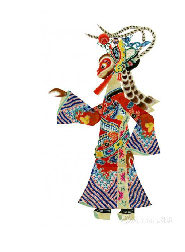

In [4]:
img1 = cv2.imread("demo.jpg")
mask,res = whiteOut(img1)
#final = np.multiply(img1,mask)
#imshow(cv2.bitwise_and(img1,mask))
img2= cv2.bitwise_and(img1,res)
imshow(img2)
res2 = np.abs(255-res)
img3 = cv2.bitwise_and(img1,res2)
imshow(img3)
img4 = np.add(img2,img3)
imshow(img4)

In [5]:
def overLay(background,image,center,orientation,scale):
    #first let's recize the image
    h,w,d = image.shape
    h = int(np.floor(h*scale))
    w = int(np.floor(w*scale))   
    resized  = cv2.resize(image, (w,h))
    mask,res = whiteOut(resized)
    
    x_center = center[0]
    y_center = center[1]
    
    tx = np.floor(x_center - w/2)
    ty = np.floor(y_center - h/2)
    
    result = background.copy()

    newImg = result[int(ty):int(ty+h),int(tx):int(tx+w),:]
    res2 = np.abs(255-res)
    img2 = cv2.bitwise_and(resized,res)
    print(newImg.shape)
    print(res2.shape)
    img3 = cv2.bitwise_and(newImg,res2)
    final = np.add(img2,img3)
    result[int(ty):int(ty+h),int(tx):int(tx+w)] = final
    
    return result

In [71]:
def newOverLay(background,image,center,orientation,scale):
    #first let's recize the image
    h,w,d = image.shape
    h = int(np.floor(h*scale))
    w = int(np.floor(w*scale))   
    resized  = cv2.resize(image, (w,h))
    
    rows,cols,d = resized.shape
    M = cv2.getRotationMatrix2D((np.floor(cols/2),np.floor(rows/2)),40,1)
    diag = int(np.floor(np.sqrt(rows*rows+cols*cols)))
    dst = cv2.warpAffine(resized,M,(diag,diag),borderValue = (255,255,255))
    
    #h,w,d = dst.shape
    mask,res = whiteOut(dst)
    imshow(res)
    
    x_center = center[0]
    y_center = center[1]
    
    tx = np.floor(x_center - diag/2)
    ty = np.floor(y_center - diag/2)
    
    result = background.copy()

    newImg = result[int(ty):int(ty+diag),int(tx):int(tx+diag),:]
    #imshow(newImg)
    res2 = np.abs(255-res)
    img2 = cv2.bitwise_and(dst,res)
    #imshow(img2)
    #print(diag)
    #print(newImg.shape)
    #print(res2.shape)
    img3 = cv2.bitwise_and(newImg,res2)
    final = np.add(img2,img3)
    result[int(ty):int(ty+diag),int(tx):int(tx+diag)] = final
    
    return result

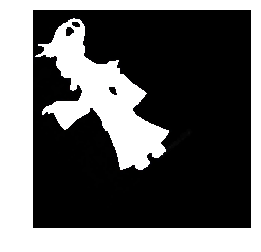

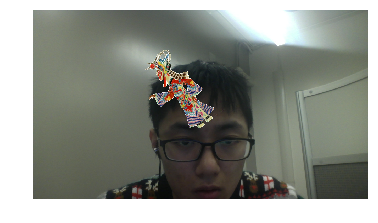

In [74]:
background = cv2.imread("bk.png")
#resized = cv2.resize(background, (1280, 720))
#resized2 = overLay(background,background,background,background,0.5)
result = newOverLay(background,img1,[640,350],45,0.6)
imshow(result)

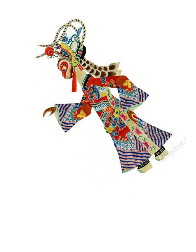

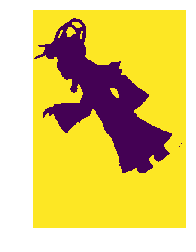

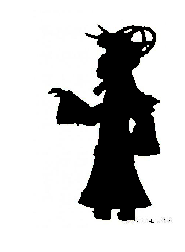

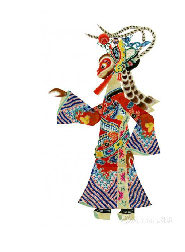

(700, 492, 3)
(600, 392, 3)
[255 255 255]


In [15]:
img = img1.copy()
rows,cols,d = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),40,1)
dst = cv2.warpAffine(img,M,(cols+100,rows+100),borderValue = (255,255,255))
#cv2.warpPerspective(dst, M, (cols+100,rows+100), cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, 255,255,255)
imshow(dst)
newMask,newRes = whiteOut(dst)
imshow(newMask)
img2= cv2.bitwise_and(dst,newRes)
#imshow(img2)
newRes2 = np.abs(255-newRes)
#img3 = cv2.bitwise_and(dst,newRes2)
imshow(img3)
#img4 = np.add(img2,img3)
imshow(img4)
print(dst.shape)
print(img.shape)
print(dst[1][1])

In [38]:
cam = cv2.VideoCapture(0)
img1 = cv2.imread("demo.jpg")
#img3 = cv2.imread("demo0.png")
h,w,d = img1.shape
k = 1
while k==1:
    ret, img2=cam.read()
    print(img2.shape)
    keypressed = cv2.waitKey(5)
    if keypressed == 27:
        break
    cv2.imwrite("bk.png",img2)
    cv2.imshow('mask',img2)
    k = k-1
    
cam.release()
cv2.destroyAllWindows() 

(720, 1280, 3)
